In [1]:
%matplotlib inline

import osmnx as ox

ox.config(use_cache=True)

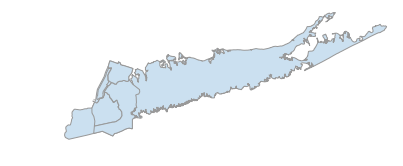

(<matplotlib.figure.Figure at 0x2e50afd2e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e50b010d30>)

In [2]:
places = ['New York, USA', 
          "Long Island, New York, USA", 
          "Manhattan, New York", 
          "Brooklyn, New York, USA", 
          "Queens, New York, USA", 
          "The Bronx, New York, USA", 
          "Staten Island, New Jersey, USA"]

city = ox.gdf_from_places(places)
ox.plot_shape(ox.project_gdf(city))

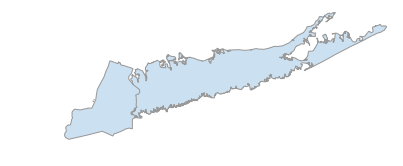

(<matplotlib.figure.Figure at 0x2e50b210a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e50b51f630>)

In [3]:
places = ['Long Island', 'New York City']
city = ox.gdf_from_places(places)
ox.plot_shape(ox.project_gdf(city))

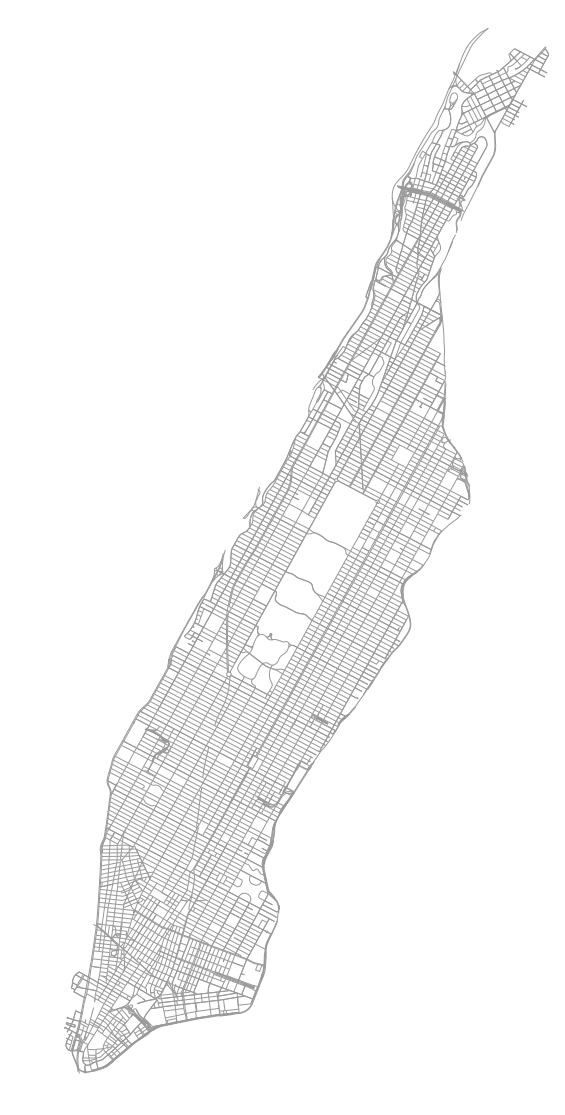

In [6]:
places = ["Manhattan, New York"]
G5 = ox.graph_from_place(places, clean_periphery=False, network_type='drive')
G5_projected = ox.project_graph(G5)
fig, ax = ox.plot_graph(G5_projected, fig_height=20, node_size=0)

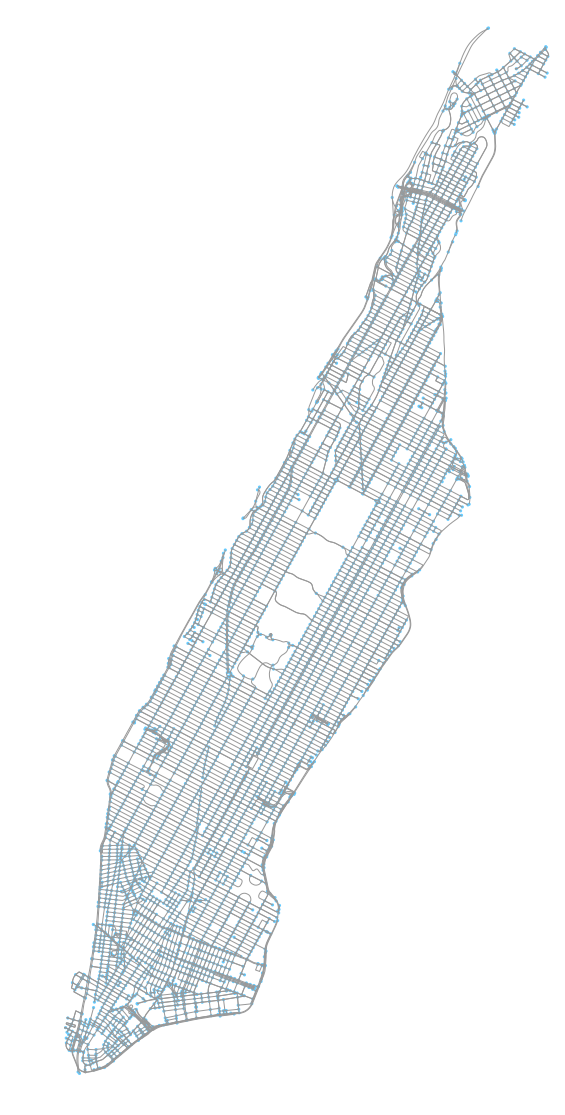

In [9]:
fig, ax = ox.plot_graph(G5_projected, fig_height=20, node_size=10)

In [13]:
G5_projected.nodes(data=True)

[(42421728,
  {'highway': 'traffic_signals',
   'lat': 40.7980472,
   'lon': -73.96004,
   'osmid': '42421728',
   'ref': nan,
   'x': 587729.35665455484,
   'y': 4516859.0270689027}),
 (42421731,
  {'highway': 'traffic_signals',
   'lat': 40.798645,
   'lon': -73.9614743,
   'osmid': '42421731',
   'ref': nan,
   'x': 587607.57342485804,
   'y': 4516923.9536821311}),
 (42421737,
  {'highway': 'traffic_signals',
   'lat': 40.7992369,
   'lon': -73.962876,
   'osmid': '42421737',
   'ref': nan,
   'x': 587488.55019145994,
   'y': 4516988.2598536853}),
 (42421741,
  {'highway': 'traffic_signals',
   'lat': 40.8004313,
   'lon': -73.9657046,
   'osmid': '42421741',
   'ref': nan,
   'x': 587248.37035306217,
   'y': 4517118.0294734156}),
 (42421745,
  {'highway': 'traffic_signals',
   'lat': 40.8014007,
   'lon': -73.9679942,
   'osmid': '42421745',
   'ref': nan,
   'x': 587053.96052313899,
   'y': 4517223.3649709234}),
 (42421749,
  {'highway': 'traffic_signals',
   'lat': 40.8016434,
  

In [23]:
origin_point = (40.7992369, -73.962876)
destination_point = (40.8013253, -73.9540275)
origin_node = ox.get_nearest_node(G5, origin_point)
destination_node = ox.get_nearest_node(G5, destination_point)
origin_node, destination_node

(42421737, 42431203)

In [18]:
import networkx as nx

In [24]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G5, origin_node, destination_node, weight='length')
str(route)

'[42421737, 42421731, 42432737, 42447295, 42435341, 42435343, 42435346, 4016646214, 42433743, 2141026499, 2141026500, 2141026525, 2141026544, 42431203]'

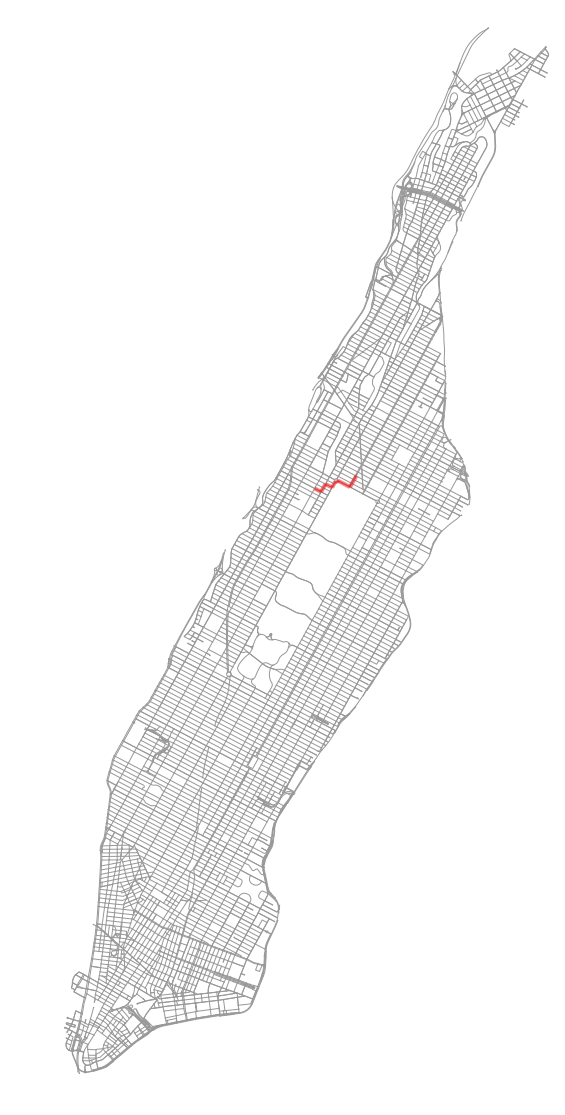

In [27]:
fig, ax = ox.plot_graph_route(G5_projected, 
                              route, 
                              origin_point=origin_point, 
                              destination_point=destination_point, 
                              fig_height=20,
                              node_size=2)

In [28]:
import pandas as pd

In [36]:
data = pd.read_csv("green_tripdata_2016-01.csv", 
                   usecols=['Trip_distance', 
                            'Pickup_longitude',
                            'Pickup_latitude', 
                            'Dropoff_longitude', 
                            'Dropoff_latitude'])

data.head(10)

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance
0,-73.928642,40.680611,-73.924278,40.698044,1.46
1,-73.952675,40.723175,-73.923920,40.761379,3.56
2,-73.971611,40.676105,-74.013161,40.646072,3.79
3,-73.989502,40.669579,-74.000648,40.689034,3.01
4,-73.964729,40.682854,-73.940720,40.663013,2.55
5,-73.891144,40.746456,-73.867744,40.742111,1.37
6,-73.896675,40.746197,-73.886192,40.745689,0.57
7,-73.953354,40.803558,-73.949150,40.794121,1.01
8,-73.994064,40.702816,-73.971573,40.679726,2.46
9,-73.914131,40.756641,-73.917549,40.739658,1.61


Pickup_longitude    -73.971611
Pickup_latitude      40.676105
Dropoff_longitude   -74.013161
Dropoff_latitude     40.646072
Trip_distance         3.790000
Name: 2, dtype: float64

In [69]:
for n in range(100):
    one_trip = data.loc[n, :]
    # print(one_trip)
    try:
        origin_point = one_trip.Pickup_latitude, one_trip.Pickup_longitude
        destination_point = one_trip.Dropoff_latitude, one_trip.Dropoff_longitude
        origin_node = ox.get_nearest_node(G5, origin_point)
        destination_node = ox.get_nearest_node(G5, destination_point)
        # print(origin_node, destination_node)

        # find the shortest path between origin and destination nodes
        route = nx.shortest_path(G5, origin_node, destination_node, weight='length')
        if len(route) > 1:
            print(n, len(route))
    except:
        pass

0 9
7 18
8 2
9 16
10 4
12 101
14 42
16 17
17 29
18 4
19 28
20 15
21 8
22 48
24 6
25 9
26 33
27 6
32 29
34 77
35 23
36 55
37 43
38 11
40 9
41 109
42 11
46 16
47 22
53 8
54 9
56 84
59 31
61 15
63 76
64 16
65 2
67 8
68 37
69 8
70 64
72 6
75 9
76 3
77 13
78 7
80 4
83 85
88 12
89 2
90 4
91 4
95 4
96 54
97 69
98 10
99 17


In [70]:
one_trip = data.loc[41, :]
print(one_trip)
origin_point = one_trip.Pickup_latitude, one_trip.Pickup_longitude
destination_point = one_trip.Dropoff_latitude, one_trip.Dropoff_longitude
origin_node = ox.get_nearest_node(G5, origin_point)
destination_node = ox.get_nearest_node(G5, destination_point)
print(origin_node, destination_node)

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G5, origin_node, destination_node, weight='length')

Pickup_longitude    -73.945259
Pickup_latitude      40.807957
Dropoff_longitude   -73.946625
Dropoff_latitude     40.715042
Trip_distance         9.970000
Name: 41, dtype: float64
42453246 42423051


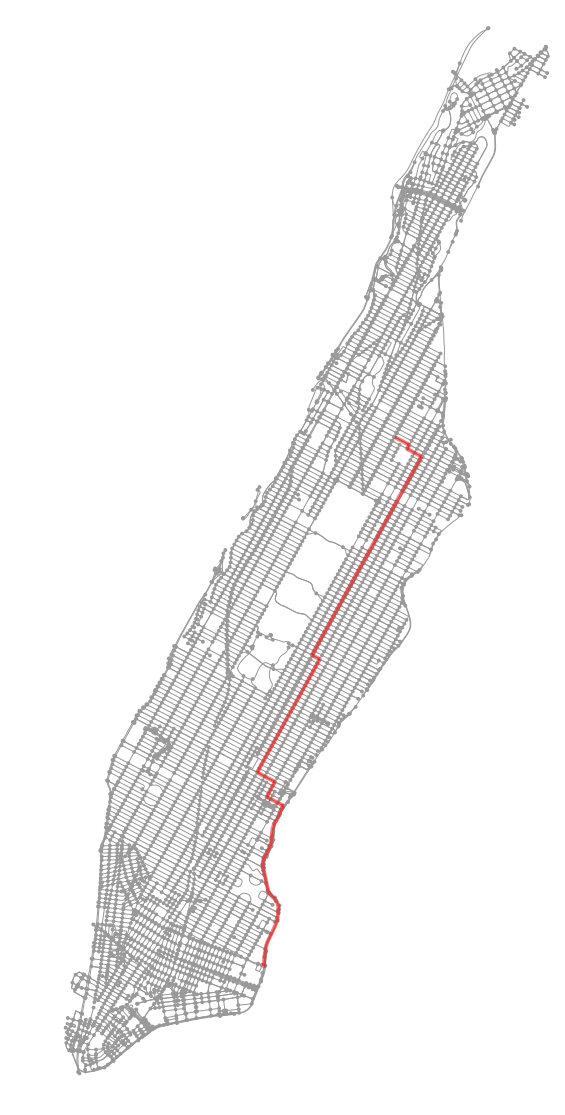

In [72]:
fig, ax = ox.plot_graph_route(G5_projected, 
                              route, 
                              origin_point=origin_point, 
                              destination_point=destination_point, 
                              fig_height=20,
                              node_size=2)

Let's calculate the total number of all possible trips.

In [83]:
len(G5_projected.nodes())**2

20097289

It is small enough that we should probably cache the results of each trip.

In [84]:
def intersections_passed_through(G, start, stop):
    return nx.shortest_path(G, start, stop, weight='length')

In [86]:
%%timeit
intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6])

100 loops, best of 3: 5.81 ms per loop


In [95]:
ms_per_route = 6
total_routes = 20000000
cores = 64 # Use multiprocessing
total_minutes_to_build_cache = ms_per_route*total_routes/1000/60/cores
total_minutes_to_build_cache

31.25

In [98]:
ms_per_route = 6
total_routes = 1000000000000
cores = 64 # Use multiprocessing
total_machines = 50
total_hours_without_cache = ms_per_route*total_routes/1000/60/cores/total_machines/60
total_hours_without_cache

520.8333333333334

Cost

In [99]:
520*50*.70

18200.0

That is too expensive.

With cache

In [90]:
cache = {}
cache[(G5.nodes()[2], G5.nodes()[6])] = intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6])

%timeit cache[(G5.nodes()[2], G5.nodes()[6])]

10000 loops, best of 3: 134 µs per loop


In [100]:
ms_per_route = .134
total_routes = 1000000000000
cores = 64 # Use multiprocessing
total_machines = 50
total_hours_without_cache = ms_per_route*total_routes/1000/60/cores/total_machines/60
total_hours_without_cache

11.631944444444446

In [101]:
11.6*50*.70

406.0

It would probably cost about $4000 all said and done. That means we should just take a sample of the data.

Because all we care about is relative counts of the number of times a taxi passes through an intersection, we can make a rough estimate of how many samples we will need.

In [104]:
intersections = 4000
intersections_per_trip = 10
min_counts_in_intersection = 100
percent_counts_in_min_intersection = 1/intersections * .001
total_intersection_counts = min_counts_in_intersection/percent_counts_in_min_intersection
trips_to_process = total_intersection_counts/intersections_per_trip
trips_to_process

40000000.0

In [106]:
ms_per_route = 6
total_routes = 40000000
cores = 128 # Use multiprocessing
total_machines = 1
total_hours_without_cache = ms_per_route*total_routes/1000/60/cores/total_machines/60
total_hours_without_cache

0.5208333333333334

This would cost $1.50 and would probably get us the results we need.

This shows that a cache would be great if we had to process the full dataset, but with the smaller dataset, it won't make a large enough impact for it to be worth making a full precomputed cache. Instead, we will just memoize the results.

In [164]:
def intersections_passed_through(G, start, stop, m):
    path = m.get((start, stop), None)
    if path:
        return path
    if start == stop:
        return []
    path = nx.shortest_path(G, start, stop, weight='length')
    if len(path) <= 2:
        return []
    m[(start, stop)] = path
    return path

In [121]:
%%timeit
m = {}
intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6], m)

100 loops, best of 3: 5.78 ms per loop


In [123]:
%%timeit
intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6], m)

10000 loops, best of 3: 147 µs per loop


In [163]:
from collections import defaultdict

In [171]:
m = {}

In [185]:
ox.great_circle??

In [186]:
ox.get_nearest_node??

In [181]:
def count_intersection_crosses(green_trip_data, G, m):
    """
    green_trip_data: file path to green taxi trip data
    G: Graph of Manhattan
    m: cache
    """
    i = 0

    intersection_counts = defaultdict(int)

    with open(green_trip_data) as trip_data:
        for trip in trip_data:
            i+=1
            if i>100:break
            t = trip.split(",")[5:9]
            try:
                t = [float(lat_long) for lat_long in t]
                start, stop = (t[1], t[0]), (t[3], t[2])
                start_node = ox.get_nearest_node(G, start)
                stop_node = ox.get_nearest_node(G, stop)
                route = intersections_passed_through(G, start_node, stop_node, m)
                for p in route:
                    intersection_counts[p] += 1
            except (ValueError, IndexError, nx.NetworkXNoPath):
                pass

In [182]:
count_intersection_crosses("green_tripdata_2016-01.csv", G5, m)

In [179]:
%load_ext line_profiler

In [183]:
%lprun -f count_intersection_crosses count_intersection_crosses("green_tripdata_2016-01.csv", G5, m)